In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from utils.data import  DataLoader
from utils.metrics import calc_metrics
from utils.visulization import plot_confusion_matrix
#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# load and split the data

In [2]:
dataset = "filtered"

if dataset == "filtered":
    filename='encoded/encoded_filtered_train_data_with_encoded_y.csv'
    test_filename='encoded/encoded_test_data_with_encoded_y.csv'


In [3]:
dl = DataLoader("./config.json")
dl.load_csv_data(filename=filename, test_filename=test_filename)
train_data = dl.get_data(include_target_column = True)
test_data = dl.get_test_data(include_target_column = True)
#train_data.info()
# split the data
X_train, y_train = dl.get_features_and_target(train_data)
X_test, y_test = dl.get_features_and_target(test_data)

loading test data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\encoded/encoded_test_data_with_encoded_y.csv
loading data from: C:\Users\dujem\PycharmProjects\bank-marketing\data\encoded/encoded_filtered_train_data_with_encoded_y.csv
memory occupation before data type conversion: 13.82 MB
memory occupation after data type conversion: 7.04 MB
memory occupation before data type conversion: 1.6 MB
memory occupation after data type conversion: 820.71 KB


In [4]:
#TODO check how to use this
"""
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
""";

# Create and fit classifier

In [5]:
clf = RandomForestClassifier(n_estimators=2000, min_samples_split=10,
                            min_samples_leaf=4,max_depth=10, bootstrap=True,
                            max_features='auto')
clf.fit(X_train, y_train);

# Make predictions on test set and display evaluation results

In [6]:
#prediction
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [7]:
calc_metrics(y_test, y_pred)
#plot_confusion_matrix(y_test, y_pred, title="Confusion matrix");

Auc:0.6128000420729893
Prec:0.6488095238095238
Rec:0.24168514412416853
Acc:0.9026462733673222
F1:0.3521809369951535
AP:0.23983748488793522


area under the curve of class  0 : 0.5317259081428466
area under the curve of class  1 : 0.7580280068025746


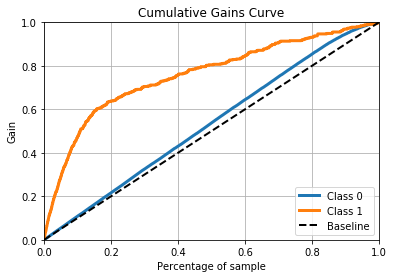

In [8]:
from utils.metrics import plot_cumulative_gain
plot_cumulative_gain(y_test, y_pred_proba)

In [9]:
import pickle

filename = 'rf_clf.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [ ]:
"""
clf = RandomForestClassifier(n_estimators=1000, min_samples_split=10,
                            min_samples_leaf=4, max_depth=10)
area under the curve of class  0 : 0.5317519798625742
area under the curve of class  1 : 0.7582411254386154

clf = RandomForestClassifier(n_estimators=2000, min_samples_split=10,
                            min_samples_leaf=4,max_depth=10, bootstrap=True,
                            max_features='auto')
area under the curve of class  0 : 0.531754428222041
area under the curve of class  1 : 0.7582599616816997
"""


# Finding important feature

No handles with labels found to put in legend.


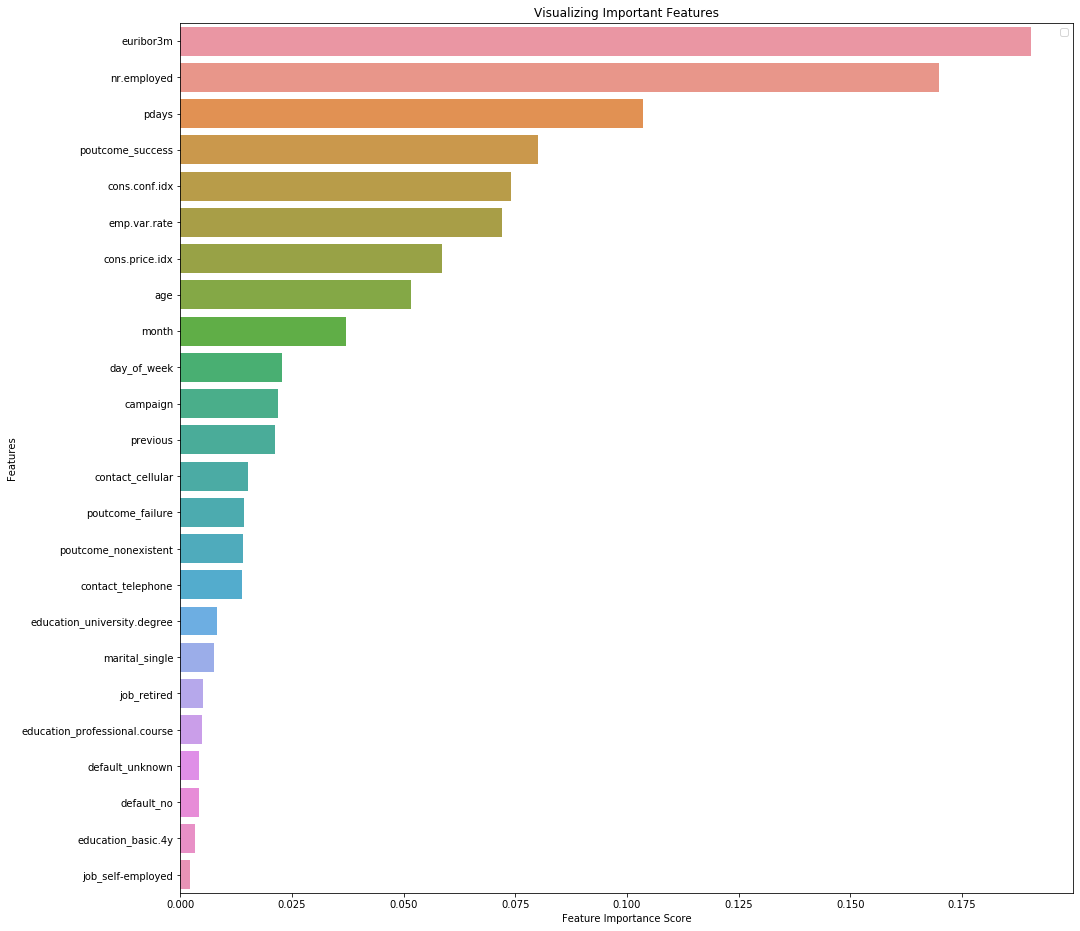

In [10]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
fig = plt.figure(figsize=(16,16))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()